In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# import os
# import glob
# import pandas as pd
# os.chdir("/content/drive/MyDrive/Dataset/Ransomware")
# extension = 'csv'
# all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
# #combine all files in the list
# combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
# #export to csv
# combined_csv.to_csv( "/content/drive/MyDrive/Dataset/Ransomware/Pletor/RANSOMWARE_Full.csv", index=False, encoding='utf-8-sig')

In [ ]:
import pandas as pd

%matplotlib inline

df = pd.read_csv('/content/drive/MyDrive/Dataset/Ransomware/Pletor/RANSOMWARE_Full.csv') # 30% subsample from original benign samples
# df = df.drop([df.columns[0]], axis=1)
df.drop_duplicates(keep=False, inplace=True)
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.217.10.10-10.42.0.211-443-40832-6,10.42.0.211,40832,172.217.10.10,443,6,22/08/2017 08:51:12,37496,1,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,53.339023,3.749600e+04,0.000000e+00,37496.0,37496.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0,0,0,0,1,1,0,0,1.0,0.00,0.000000,0.0,32,0,0,0,0,0,0,1,0,1,0,1548,170,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RANSOMWARE_JISUT
1,172.217.10.10-10.42.0.211-443-37063-6,10.42.0.211,37063,172.217.10.10,443,6,22/08/2017 08:51:16,36297,1,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,55.100973,3.629700e+04,0.000000e+00,36297.0,36297.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0,0,0,0,1,1,0,0,1.0,0.00,0.000000,0.0,32,0,0,0,0,0,0,1,0,1,0,1903,189,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RANSOMWARE_JISUT
2,172.217.10.10-10.42.0.211-443-38740-6,10.42.0.211,38740,172.217.10.10,443,6,22/08/2017 08:51:19,36742,1,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,54.433618,3.674200e+04,0.000000e+00,36742.0,36742.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0,0,0,0,1,1,0,0,1.0,0.00,0.000000,0.0,32,0,0,0,0,0,0,1,0,1,0,2089,175,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RANSOMWARE_JISUT
3,10.42.0.211-91.190.218.58-42420-12350-6,10.42.0.211,42420,91.190.218.58,12350,6,22/08/2017 08:51:23,5010724,3,1,5.0,5.0,5.0,0.0,1.666667,2.886751,5.0,5.0,5.0,0.000000,1.995720,0.798288,1.670241e+06,2.755238e+06,4851641.0,60660.0,5010724.0,2505362.0,3.318140e+06,4851641.0,159083.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,...,5.0,3.0,2.738613,7.5,0,1,0,0,1,0,0,0,0.0,3.75,1.666667,5.0,96,0,0,0,0,0,0,3,5,1,5,1386,9,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RANSOMWARE_JISUT
4,10.42.0.211-111.221.77.148-46980-40010-6,10.42.0.211,46980,111.221.77.148,40010,6,22/08/2017 08:51:23,5014658,3,2,271.0,4.0,271.0,0.0,90.333333,156.461923,4.0,0.0,2.0,2.828427,54.839233,0.997077,1.253664e+06,2.273640e+06,4661264.0,52.0,5014658.0,2507329.0,3.046124e+06,4661264.0,353394.0,52.0,52.0,0.0,52.0,52.0,1,0,0,0,...,271.0,91.0,139.436007,19442.4,0,1,0,0,1,0,0,0,0.0,109.20,90.333333,2.0,96,0,0,0,0,0,0,3,271,2,4,1455,37,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RANSOMWARE_JISUT


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df = df.rename(columns={' Label': 'Label', ' Flow ID': 'Flow ID'})
# df = df[(df['Original_label'].str.contains("RANSOMWARE_CHARGER|BENIGN", case=False))]

In [ ]:
# df = df[['Label',' Timestamp',' CWE Flag Count',' Packet Length Std',' ACK Flag Count', ' Active Max', ' Active Std',' Average Packet Size', ' Avg Fwd Segment Size',' Bwd Header Length', ' Bwd IAT Max', ' Bwd Packet Length Min',' Bwd Packet Length Std', ' Bwd Packets/s', ' Destination IP',' Destination Port', ' Down/Up Ratio', ' Flow Duration',' Flow IAT Mean', ' Flow IAT Min', ' Flow IAT Std',' Fwd Header Length', ' Fwd IAT Max', ' Fwd IAT Min',' Fwd Packet Length Min', ' Fwd Packet Length Std',' Init_Win_bytes_backward', ' PSH Flag Count', ' SYN Flag Count',' Source IP', ' Source Port', ' URG Flag Count',' act_data_pkt_fwd', ' min_seg_size_forward', 'FIN Flag Count','Flow Bytes/s', 'Flow ID', 'Init_Win_bytes_forward']]
# df.head() 

In [ ]:
df.shape

(1554458, 85)

In [ ]:
df.describe()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554457e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1554458.0,1554458.0,1554458.0,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1554458.0,1.554458e+06,1.554458e+06,1.554458e+06,1554458.0,1554458.0,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1554458.0,1554458.0,1554458.0,1554458.0,1554458.0,1554458.0,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06,1.554458e+06
mean,3.855320e+04,5.912858e+03,8.231069e+00,1.034516e+07,7.541671e+00,1.165435e+01,8.294599e+02,1.276361e+04,2.140139e+02,1.201018e+01,5.958425e+01,7.782892e+01,3.410676e+02,2.382825e+01,1.807966e+02,1.294465e+02,1.016908e+05,inf,2.813370e+06,2.381948e+06,8.944263e+06,1.700038e+06,6.911442e+06,2.820911e+06,1.822281e+06,5.688860e+06,1.749508e+06,5.541648e+06,9.617214e+05,1.396352e+06,4.732260e+06,3.632311e+05,7.915749e-02,0.0,0.0,0.0,-3.069974e+05,-4.611255e+05,4.603643e+03,1.344615e+03,7.920676e+00,3.927239e+02,1.238826e+02,1.520220e+02,7.846684e+04,1.486113e-02,7.915749e-02,0.0,3.131477e-01,4.580645e-01,2.215364e-01,0.0,0.0,6.110889e-01,1.361574e+02,5.958425e+01,1.807966e+02,-3.069974e+05,0.0,0.0,0.0,0.0,0.0,0.0,7.541671e+00,8.294599e+02,1.165435e+01,1.276361e+04,2.208581e+04,1.895325e+03,1.673343e+00,-2.584587e+03,1.467156e+05,2.123263e+04,1.675249e+05,1.298663e+05,4.043624e+06,3.341546e+05,4.328696e+06,3.787542e+06
std,1.866039e+04,1.537837e+04,4.509338e+00,2.159311e+07,5.140015e+01,1.644173e+02,2.487096e+04,2.348701e+05,4.289252e+02,5.577812e+01,1.287410e+02,1.609625e+02,5.608499e+02,6.393226e+01,3.264898e+02,2.355202e+02,8.635433e+05,NaN,7.697696e+06,6.286090e+06,1.824737e+07,7.005161e+06,1.798166e+07,8.198050e+06,6.008042e+06,1.411846e+07,7.399676e+06,1.778341e+07,4.772881e+06,5.354055e+06,1.533254e+07,3.881956e+06,2.699845e-01,0.0,0.0,0.0,1.898767e+08,3.055818e+08,3.520546e+04,1.255208e+04,1.917054e+01,6.211672e+02,2.085577e+02,2.352789e+02,1.595976e+05,1.209970e-01,2.699845e-01,0.0,4.637740e-01,4.982385e-01,4.152808e-01,0.0,0.0,6.678610e-01,2.141721e+02,1.287410e+02,3.264898e+02,1.898767e+08,0.0,0.0,0.0,0.0,0.0,0.0,5.140015e+01,

In [ ]:
# dff=df[(df['Label'].str.contains("BENIGN"))]
d0 = df.query("Label == 'BENIGN'").sample(n=60000, random_state=0)
d1 = df = df[(df['Label'].str.contains("RANSOMWARE", case=False))]
df=pd.concat([d0,d1])
df.shape

(408943, 85)

In [ ]:
df['Label'].value_counts()

BENIGN                    60000
RANSOMWARE_SVPENG         54161
RANSOMWARE_PORNDROID      46082
RANSOMWARE_KOLER          44555
RANSOMWARE_RANSOMBO       39859
RANSOMWARE_CHARGER        39551
RANSOMWARE_SIMPLOCKER     36340
RANSOMWARE_WANNALOCKER    32701
RANSOMWARE_JISUT          25672
RANSOMWARE_LOCKERPIN      25307
RANSOMWARE_PLETOR          4715
Name: Label, dtype: int64

In [ ]:
len(df['Label'].value_counts())

11

Data contains 11 unique families, that belong to:
- benign (non-malware);
- ransomware;

In [ ]:
df['Label'].isnull().sum()

0

In [ ]:
df.isnull().sum()

Flow ID              0
 Source IP           0
 Source Port         0
 Destination IP      0
 Destination Port    0
                    ..
Idle Mean            0
 Idle Std            0
 Idle Max            0
 Idle Min            0
Label                0
Length: 85, dtype: int64

Drop rows with values missing for label column (target variable).

In [ ]:
df.dropna(subset=['Label'], inplace=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def draw_pie_chart(df, fre):
    labels = df[fre].astype('category').cat.categories.tolist()
    counts = df[fre].value_counts()
    sizes = [counts[var_cat] for var_cat in labels]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, radius=2000)
    ax1.axis('equal')
    plt.show()

def plot_all_classes_distribution(df):
    plt.figure(figsize=(16, 8))
    count = df['Label'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(count.index, count.values, alpha=0.9)
    plt.title('Frequency Distribution', fontsize=20)
    plt.ylabel('Number of Occurrences', fontsize=15)
    plt.xlabel('Observation class (benign or malware family)', fontsize=15)
    plt.xticks(rotation=90)
    plt.show()


def plot_stacked_hist(df, x_var, groupby_var):
    df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
    vals = [df[x_var].values.tolist() for i, df in df_agg]

    plt.figure(figsize=(16, 16), dpi=80)
    colors = [plt.cm.Spectral(i / float(len(vals) - 1)) for i in range(len(vals))]
    n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

    plt.legend({group: col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
    plt.title(f"Stacked Histogram of ${x_var}$ colored by class", fontsize=8)
    plt.xlabel(x_var)
    plt.ylabel("Frequency")
    plt.ylim(0, 100)
    plt.xticks(ticks=bins[::3], labels=[round(b, 1) for b in bins[::3]])
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


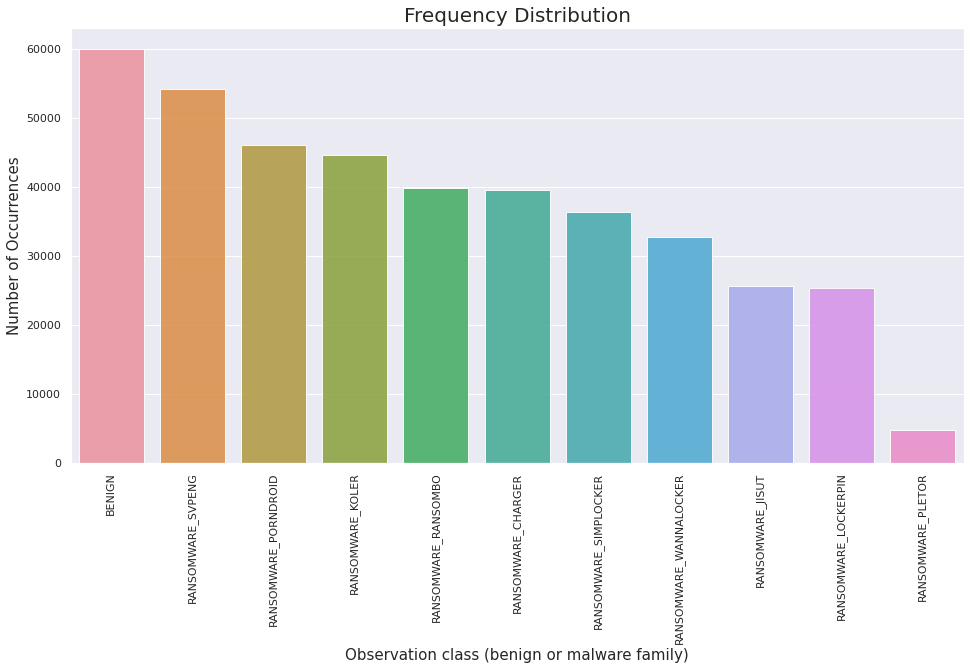

In [ ]:
import sys
sys.path.append("..")
plot_all_classes_distribution(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


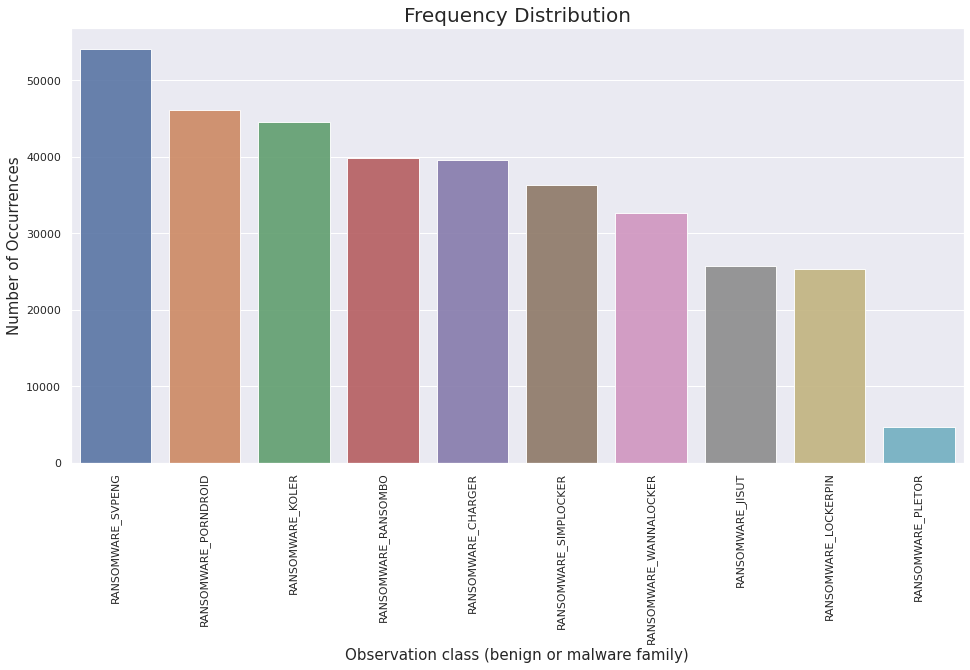

In [ ]:
plot_all_classes_distribution(df[df.Label != 'BENIGN'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df[' Timestamp'] = pd.to_datetime(df[' Timestamp'], errors='coerce')

In [ ]:
df.select_dtypes(exclude=['int', 'float', 'datetime'])

,Flow ID,Source IP,Destination IP,Label
1484260,10.42.0.211-121.12.98.64-56153-80-6,10.42.0.211,121.12.98.64,BENIGN
953606,10.42.0.1-10.42.0.42-53-1166-17,10.42.0.42,10.42.0.1,BENIGN
897908,10.42.0.211-36.248.26.157-60395-80-6,10.42.0.211,36.248.26.157,BENIGN
1530694,10.42.0.151-104.244.43.163-53059-443-6,10.42.0.151,104.244.43.163,BENIGN
350048,10.42.0.211-31.13.71.1-44537-443-6,10.42.0.211,31.13.71.1,BENIGN
...,...,...,...,...
1554453,157.55.130.145-10.42.0.151-40030-43477-17,10.42.0.151,157.55.130.145,RANSOMWARE_PLETOR
1554454,255.255.255.255-0.0.0.0-67-68-17,0.0.0.0,255.255.255.255,RANSOMWARE_PLETOR
1554455,157.55.56.163-10.42.0.151-40027-43477-17,10.42.0.151,157.55.56.163,RANSOMWARE_PLETOR
1554456,10.42.0.151-10.42.0.1-64218-53-17,10.42.0.151,10.42.0.1,RANSOMWARE_PLETOR


In [ ]:
# df[' Packet Length Std'] = pd.to_numeric(df[' Packet Length Std'], errors='coerce')
df[' CWE Flag Count'] = pd.to_numeric(df[' CWE Flag Count'], errors='coerce')
df[' Packet Length Std'] = pd.to_numeric(df[' Packet Length Std'], errors='coerce')

In [ ]:
df.select_dtypes(exclude=['int', 'float', 'datetime'])

,Flow ID,Source IP,Destination IP,Label
1484260,10.42.0.211-121.12.98.64-56153-80-6,10.42.0.211,121.12.98.64,BENIGN
953606,10.42.0.1-10.42.0.42-53-1166-17,10.42.0.42,10.42.0.1,BENIGN
897908,10.42.0.211-36.248.26.157-60395-80-6,10.42.0.211,36.248.26.157,BENIGN
1530694,10.42.0.151-104.244.43.163-53059-443-6,10.42.0.151,104.244.43.163,BENIGN
350048,10.42.0.211-31.13.71.1-44537-443-6,10.42.0.211,31.13.71.1,BENIGN
...,...,...,...,...
1554453,157.55.130.145-10.42.0.151-40030-43477-17,10.42.0.151,157.55.130.145,RANSOMWARE_PLETOR
1554454,255.255.255.255-0.0.0.0-67-68-17,0.0.0.0,255.255.255.255,RANSOMWARE_PLETOR
1554455,157.55.56.163-10.42.0.151-40027-43477-17,10.42.0.151,157.55.56.163,RANSOMWARE_PLETOR
1554456,10.42.0.151-10.42.0.1-64218-53-17,10.42.0.151,10.42.0.1,RANSOMWARE_PLETOR


In [ ]:
df['Flow ID'] = df['Flow ID'].astype('str')
df[' Source IP'] = df[' Source IP'].astype('str') 
df[' Destination IP'] = df[' Destination IP'].astype('str')

In [ ]:
len(df['Flow ID'].unique())

235945

Unique Flow ID feature values is less than amount of observations, so this 
feature currently should be kept.

In [ ]:
df.shape

(408943, 85)

In [ ]:
df.groupby('Label').describe()

Source Port                ...  Idle Min             
                              count          mean  ...       75%          max
Label                                              ...                       
BENIGN                      60000.0  38350.241767  ...       0.0  119808973.0
RANSOMWARE_CHARGER          39551.0  39000.248413  ...       0.0  119146594.0
RANSOMWARE_JISUT            25672.0  38786.338034  ...       0.0  119230232.0
RANSOMWARE_KOLER            44555.0  39754.902570  ...       0.0  119626648.0
RANSOMWARE_LOCKERPIN        25307.0  38645.205200  ...       0.0  118154971.0
RANSOMWARE_PLETOR            4715.0  22155.097349  ...       0.0  118457536.0
RANSOMWARE_PORNDROID        46082.0  39131.789202  ...       0.0  119167393.0
RANSOMWARE_RANSOMBO         39859.0  38757.740360  ...       0.0  118856753.0
RANSOMWARE_SIMPLOCKER       36340.0  39019.479994  ...       0.0  119794170.0
RANSOMWARE_SVPENG           54161.0  38127.225605  ...       0.0  119660314.0
RANSOMWARE_WANNALOCKER      32701.0  39328.113758  ...       0.0  119436035.0

[11 rows x 640 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder

class_encoder = LabelEncoder()
df["Label"] = class_encoder.fit_transform(df["Label"])
df.Label.unique()

array([ 0,  2,  3,  4,  6,  7,  9, 10,  8,  1,  5])

In [ ]:
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1484260,10.42.0.211-121.12.98.64-56153-80-6,10.42.0.211,56153,121.12.98.64,80,6,2017-06-21 12:52:28,634487,1,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,3.152153,634487.0,0.000000e+00,634487.0,634487.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,0,0,0,...,0.0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1.0,0.000000,0.0,0.000000,20,0,0,0,0,0,0,1,0,1,0,2145,519,0,20,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0
953606,10.42.0.1-10.42.0.42-53-1166-17,10.42.0.42,1166,10.42.0.1,53,17,2017-08-07 05:19:51,54271,1,1,31.0,74.0,31.0,31.0,31.0,0.000000,74.0,74.0,74.000000,0.000000,1934.734941,36.852094,54271.0,0.000000e+00,54271.0,54271.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,0,0,0,...,74.0,45.333333,24.826062,616.333333,0,0,0,0,0,0,0,0,1.0,68.000000,31.0,74.000000,40,0,0,0,0,0,0,1,31,1,74,-1,-1,0,40,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0
897908,10.42.0.211-36.248.26.157-60395-80-6,10.42.0.211,60395,36.248.26.157,80,6,2017-07-07 10:44:08,6968378,2,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.287011,6968378.0,0.000000e+00,6968378.0,6968378.0,6968378.0,6968378.0,0.000000e+00,6968378.0,6968378.0,0.0,0.0,0.000000e+00,0.0,0.0,0,0,0,0,...,0.0,0.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,0.0,0.000000,0.0,0.000000,40,0,0,0,0,0,0,2,0,0,0,1477,-1,0,20,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0
1530694,10.42.0.151-104.244.43.163-53059-443-6,10.42.0.151,53059,104.244.43.163,443,6,2017-06-22 12:30:07,18380,1,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,108.813928,18380.0,0.000000e+00,18380.0,18380.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,0,0,0,...,0.0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1.0,0.000000,0.0,0.000000,32,0,0,0,0,0,0,1,0,1,0,3541,74,0,32,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0
350048,10.42.0.211-31.13.71.1-44537-443-6,10.42.0.211,44537,31.13.71.1,443,6,2017-06-08 12:25:10,70992911,5,6,219.0,257.0,219.0,0.0,43.8,97.939777,138.0,0.0,42.833333,56.087135,6.704895,0.154945,7099291.1,2.042648e+07,64992917.0,35.0,5999952.0,1499988.0,2.948994e+06,5923395.0,94.0,70963105.0,14192621.0,2.852190e+07,65005020.0,35.0,0,0,0,0,...,219.0,39.666667,71.233717,5074.242424,0,0,0,1,0,0,0,0,1.0,43.272727,43.8,42.833333,168,0,0,0,0,0,0,5,219,6,257,65535,114,1,32,38278.5,5524.625281,42185.0,34372.0,35458156.0,4.176846e+07,64992917.0,5923395.0,0


In [ ]:
df["Flow ID"] = LabelEncoder().fit_transform(df["Flow ID"])
df[" Source IP"] = LabelEncoder().fit_transform(df[" Source IP"])
df[" Destination IP"] = LabelEncoder().fit_transform(df[" Destination IP"])
df[" Timestamp"] = LabelEncoder().fit_transform(df[" Timestamp"])

Drop the features which have only 1 unique value:



In [ ]:
nunique = df.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
df.drop(cols_to_drop, axis=1, inplace=True)
df.shape

(408943, 73)

In [ ]:
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1484260,98594,16,56153,589,80,6,28419,634487,1,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,3.152153,634487.0,0.000000e+00,634487.0,634487.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,20,20,1.576076,1.576076,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,1,0,1.0,0.000000,0.0,0.000000,20,1,0,1,0,2145,519,0,20,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0
953606,549,17,1166,22,53,17,41495,54271,1,1,31.0,74.0,31.0,31.0,31.0,0.000000,74.0,74.0,74.000000,0.000000,1934.734941,36.852094,54271.0,0.000000e+00,54271.0,54271.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,40,32,18.426047,18.426047,31.0,74.0,45.333333,24.826062,616.333333,0,0,0,0,0,1.0,68.000000,31.0,74.000000,40,1,31,1,74,-1,-1,0,40,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0
897908,107831,16,60395,3586,80,6,36583,6968378,2,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.287011,6968378.0,0.000000e+00,6968378.0,6968378.0,6968378.0,6968378.0,0.000000e+00,6968378.0,6968378.0,0.0,0.0,0.000000e+00,0.0,0.0,0,40,0,0.287011,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,1,1,0.0,0.000000,0.0,0.000000,40,2,0,0,0,1477,-1,0,20,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0
1530694,36687,15,53059,149,443,6,31044,18380,1,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,108.813928,18380.0,0.000000e+00,18380.0,18380.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,32,32,54.406964,54.406964,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,1,0,1.0,0.000000,0.0,0.000000,32,1,0,1,0,3541,74,0,32,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0
350048,105521,16,44537,3434,443,6,17053,70992911,5,6,219.0,257.0,219.0,0.0,43.8,97.939777,138.0,0.0,42.833333,56.087135,6.704895,0.154945,7099291.1,2.042648e+07,64992917.0,35.0,5999952.0,1499988.0,2.948994e+06,5923395.0,94.0,70963105.0,14192621.0,2.852190e+07,65005020.0,35.0,0,168,200,0.070430,0.084515,0.0,219.0,39.666667,71.233717,5074.242424,0,0,1,0,0,1.0,43.272727,43.8,42.833333,168,5,219,6,257,65535,114,1,32,38278.5,5524.625281,42185.0,34372.0,35458156.0,4.176846e+07,64992917.0,5923395.0,0


In [ ]:
# df[' Timestamp'] = df[' Timestamp'].values.astype(float)

In [ ]:
import pandas as pd

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.int64)
df = clean_dataset(df)

In [ ]:
nunique = df.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
df.drop(cols_to_drop, axis=1, inplace=True)
df.shape

(408943, 73)

In [ ]:
df.to_csv('/content/drive/MyDrive/Dataset/new1_encoded_dataset.csv', index=False)

12 features were eliminated.

Null-hypothesis:  the sample from the population follows a normal distribution according to the Anderson-Darling test results. If the test statistic is higher than a critical value, the null hypothesis is rejected at the corresponding significance level (i.e there is evidence to suggest that the population doesn’t follow that particular distribution).

In [ ]:
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1484260,98594,16,56153,589,80,6,28419,634487,1,1,0,0,0,0,0,0,0,0,0,0,0,3,634487,0,634487,634487,0,0,0,0,0,0,0,0,0,0,0,20,20,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,20,1,0,1,0,2145,519,0,20,0,0,0,0,0,0,0,0,0
953606,549,17,1166,22,53,17,41495,54271,1,1,31,74,31,31,31,0,74,74,74,0,1934,36,54271,0,54271,54271,0,0,0,0,0,0,0,0,0,0,0,40,32,18,18,31,74,45,24,616,0,0,0,0,0,1,68,31,74,40,1,31,1,74,-1,-1,0,40,0,0,0,0,0,0,0,0,0
897908,107831,16,60395,3586,80,6,36583,6968378,2,0,0,0,0,0,0,0,0,0,0,0,0,0,6968378,0,6968378,6968378,6968378,6968378,0,6968378,6968378,0,0,0,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,40,2,0,0,0,1477,-1,0,20,0,0,0,0,0,0,0,0,0
1530694,36687,15,53059,149,443,6,31044,18380,1,1,0,0,0,0,0,0,0,0,0,0,0,108,18380,0,18380,18380,0,0,0,0,0,0,0,0,0,0,0,32,32,54,54,0,0,0,0,0,0,0,0,1,0,1,0,0,0,32,1,0,1,0,3541,74,0,32,0,0,0,0,0,0,0,0,0
350048,105521,16,44537,3434,443,6,17053,70992911,5,6,219,257,219,0,43,97,138,0,42,56,6,0,7099291,20426476,64992917,35,5999952,1499988,2948994,5923395,94,70963105,14192621,28521897,65005020,35,0,168,200,0,0,0,219,39,71,5074,0,0,1,0,0,1,43,43,42,168,5,219,6,257,65535,114,1,32,38278,5524,42185,34372,35458156,41768459,64992917,5923395,0


In [ ]:
import scipy.stats

scipy.stats.anderson(df['Label'], dist='norm')


AndersonResult(statistic=12250.133573277912, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

According to the outputs of multi-class target variable values arrays, the null hypothesis is rejected at all significance levels here as the test statistic is higher than all the critical values. Thus classes distribution doesn't follow normal distribution.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_correlation(data, method):
    fig, ax = plt.subplots(figsize=(60, 60))
    sns.set(font_scale=5)
    correlation_matrix = data.corr(method=method, min_periods=1)
    sns.heatmap(correlation_matrix, ax=ax, cmap="plasma", fmt="d")
    ax.set_ylabel('')
    ax.set_xlabel('')
    plt.show()


def drop_lin_correlated(df_in, method):
    lower_bound = -0.8
    upper_bound = 0.8
    corr_matrix = df_in.corr(method=method, min_periods=1).abs()
    # the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find indices of feature columns with correlation greater than 0.80
    features_above_max = [column for column in upper.columns if any(upper[column] > upper_bound)]
    # Find indices of feature columns with correlation less than -0.8
    features_below_min = [column for column in upper.columns if any(upper[column] < lower_bound)]
    features_to_drop = features_above_max + features_below_min
    df_out = df_in.drop(features_to_drop, axis=1)

    return df_out

def plot_correlation_bivariate(df, fre1, fre2):
    ax = plt.subplot(111, xlabel=fre1, ylabel=fre2, title='Features correlation')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                  ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)
    plt.scatter(df[fre1], df[fre2])
    plt.show()


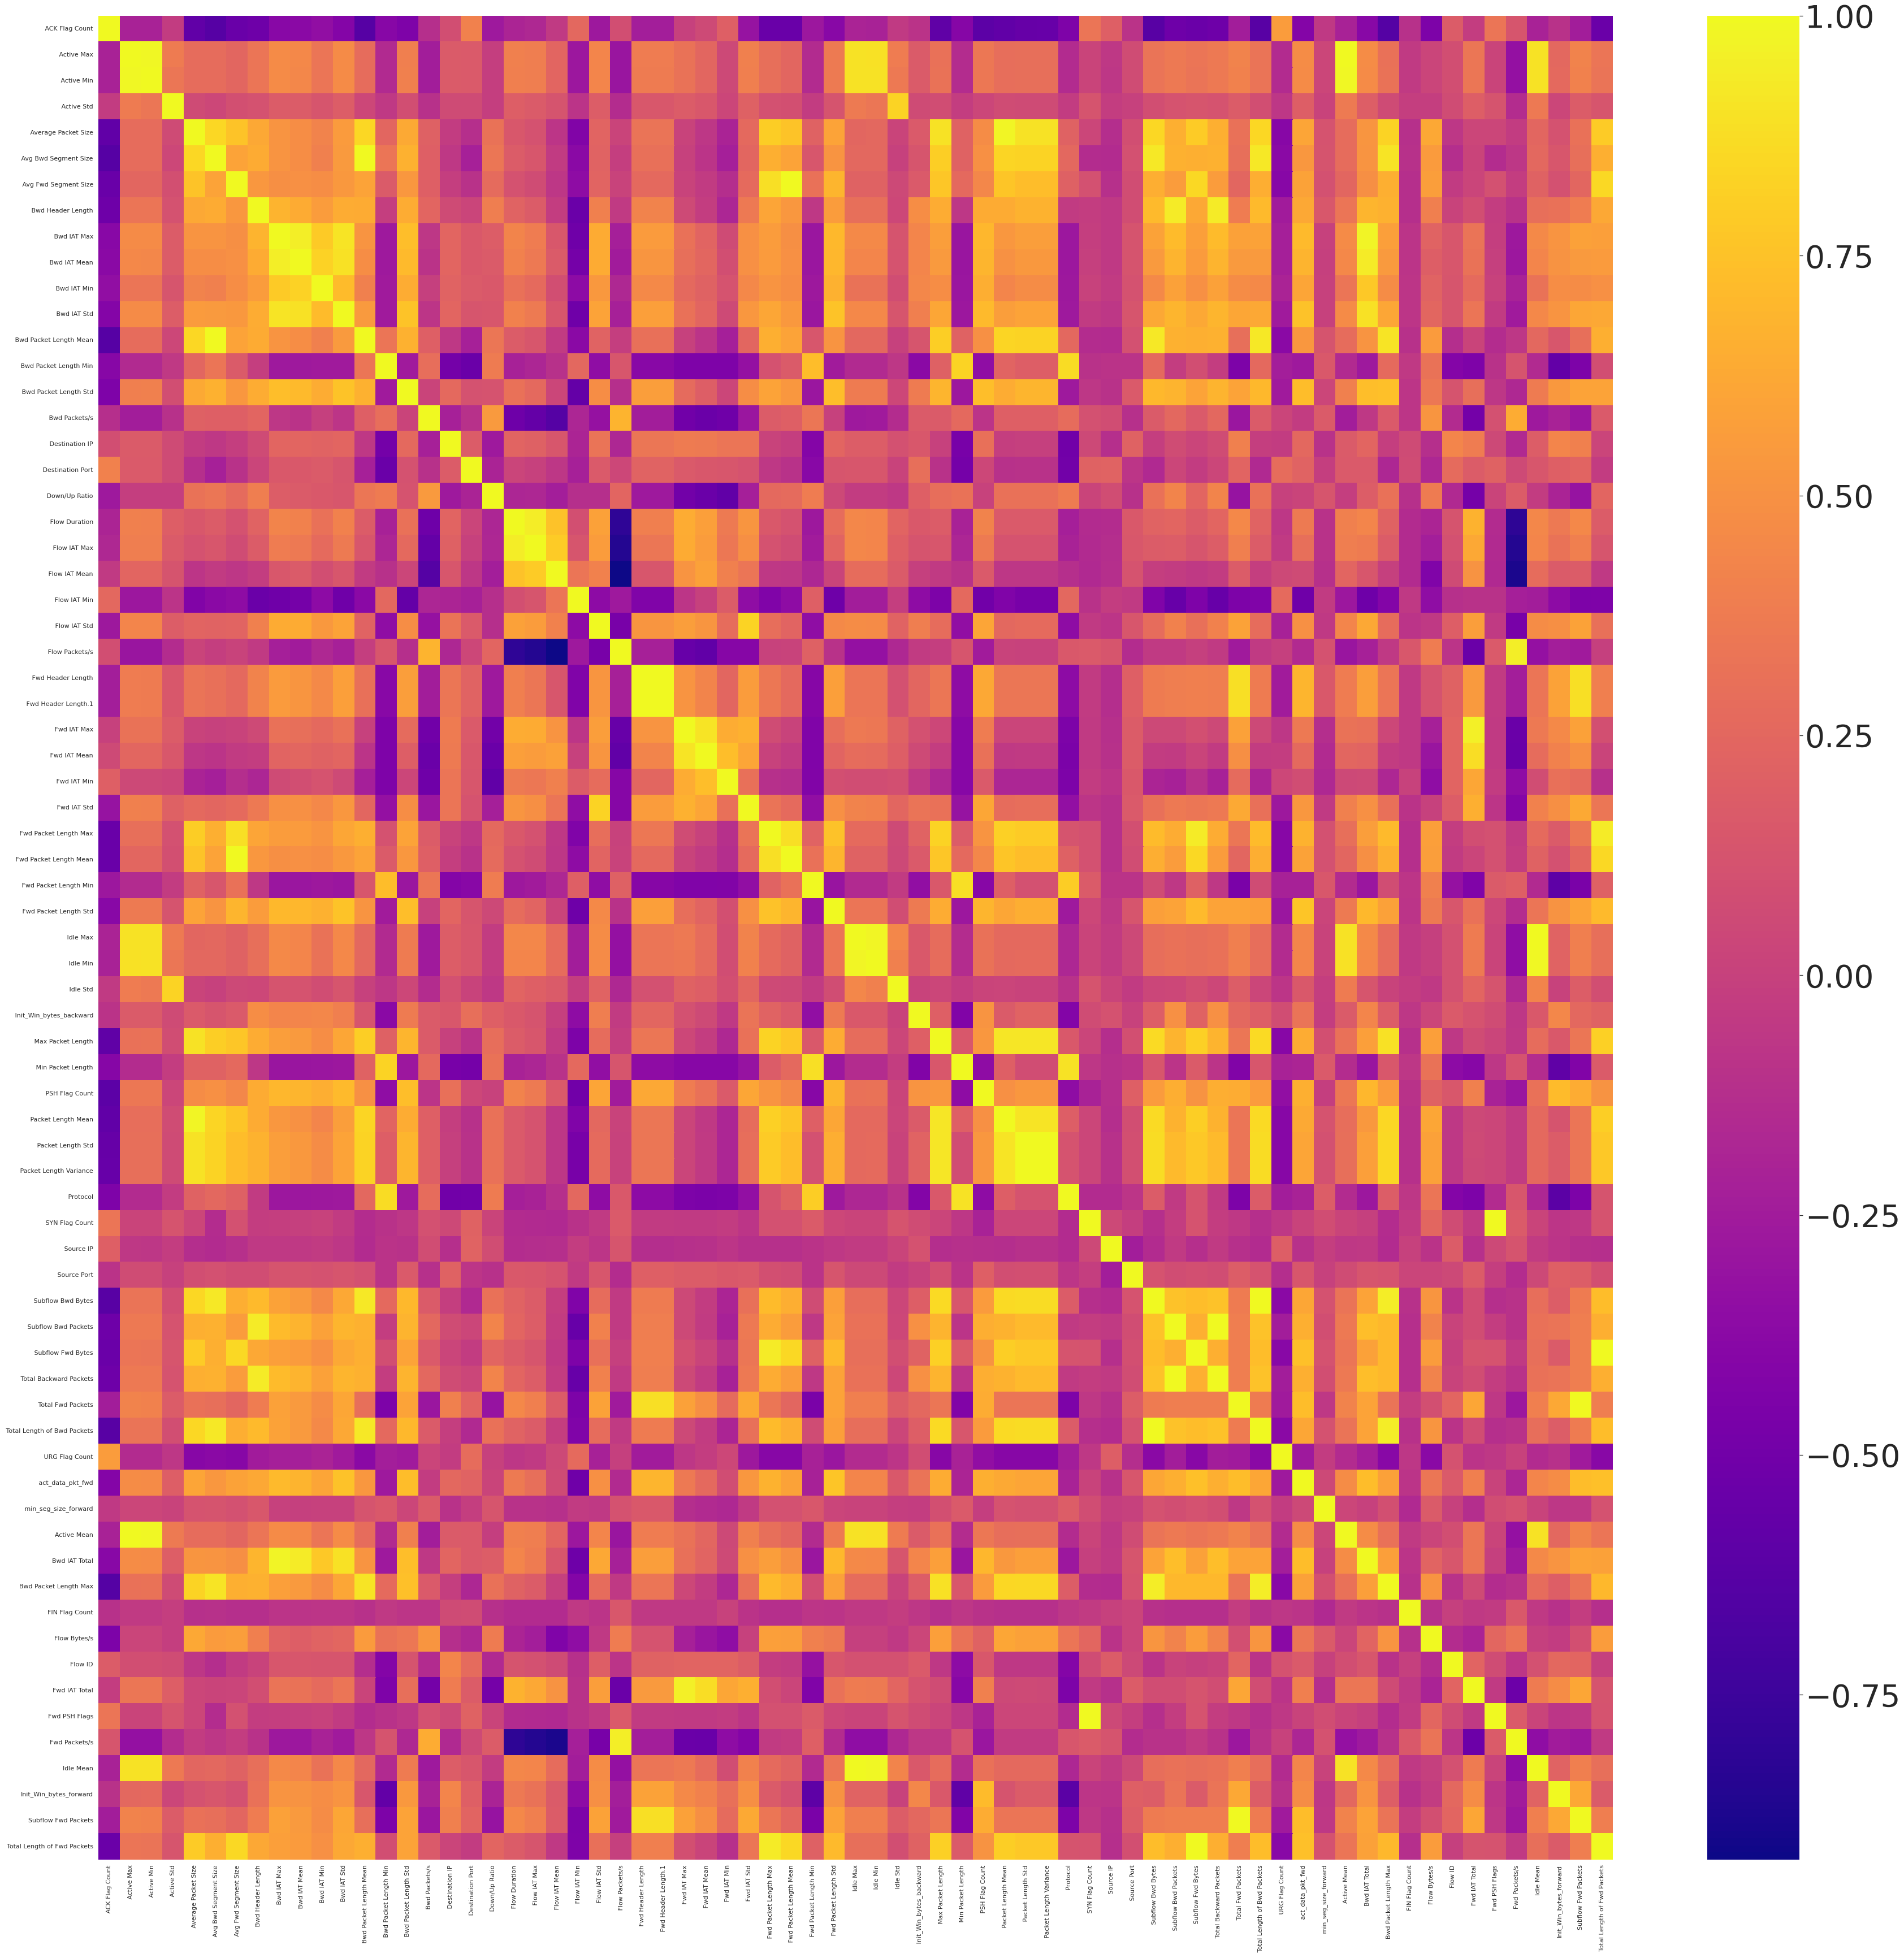

In [ ]:
plot_correlation(df[df.columns.difference(['Label', ' Timestamp'])], 'kendall')

Acording to the Kendall's correlation heatmap above,we can suggest that the dataset may contain a fair amount of redundant information as there are features that have too high or too low pairwise linear correlation based on Kendall's tau coefficient. The reason for selecting Kendall's tau as a measure of linear correlation is becase there are numerical features and categorical output variable (45 possible values).
The idea is to perform feature selection whether based on Kendall's tau coefficient value in range [-0.8, 0) and (0, 0.8] or based on ANOVA's test.

In [ ]:
filtered_out_features = drop_lin_correlated(df[df.columns.difference(['Label', ' Timestamp'])], method="kendall")
filtered_out_features.columns.values

array([' ACK Flag Count', ' Active Max', ' Active Std',
       ' Average Packet Size', ' Avg Fwd Segment Size',
       ' Bwd Header Length', ' Bwd IAT Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Std', ' Bwd Packets/s', ' Destination IP',
       ' Destination Port', ' Down/Up Ratio', ' Flow Duration',
       ' Flow IAT Mean', ' Flow IAT Min', ' Flow IAT Std',
       ' Fwd Header Length', ' Fwd IAT Max', ' Fwd IAT Min',
       ' Fwd Packet Length Min', ' Fwd Packet Length Std',
       ' Init_Win_bytes_backward', ' PSH Flag Count', ' SYN Flag Count',
       ' Source IP', ' Source Port', ' URG Flag Count',
       ' act_data_pkt_fwd', ' min_seg_size_forward', 'FIN Flag Count',
       'Flow Bytes/s', 'Flow ID', 'Init_Win_bytes_forward'], dtype=object)

In [ ]:
len(filtered_out_features.columns.values)

34

After selecting features based on Kendall's tau value, 35 (34 + Timeframe 

---

feature) of 73 features have left.

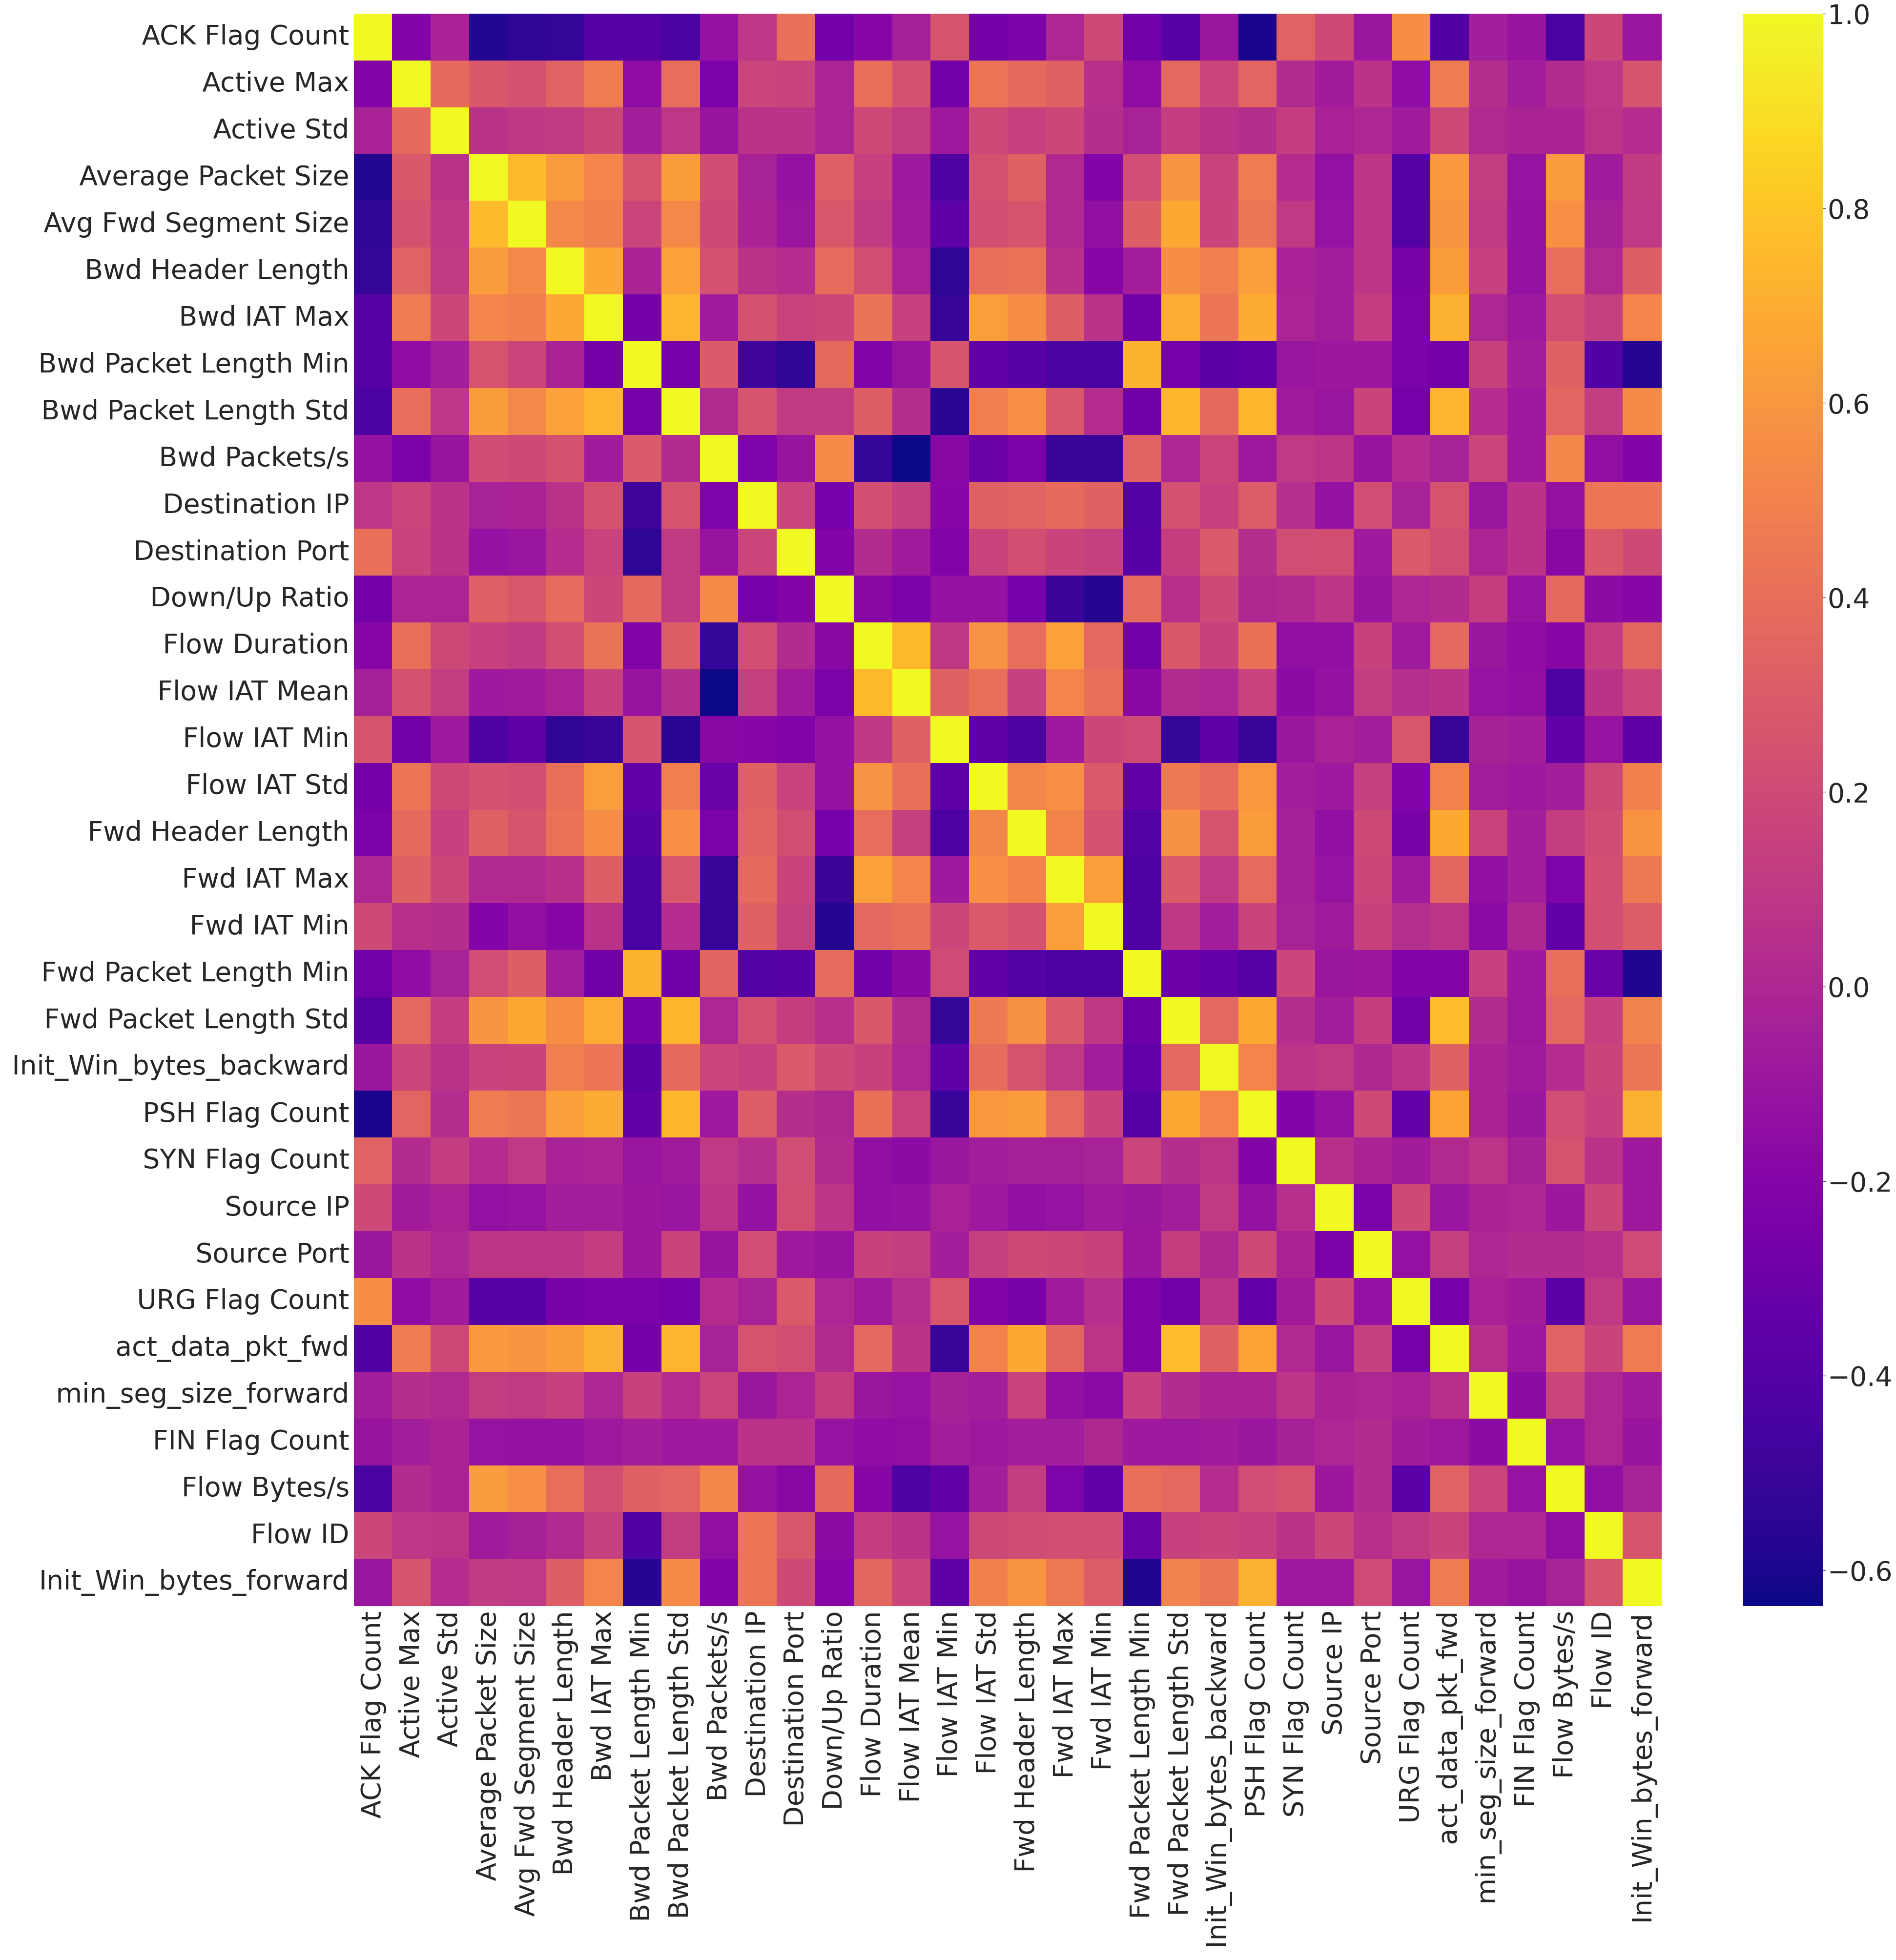

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_correlation(filtered_out_features, 'kendall')
plt.savefig('/content/drive/MyDrive/Dataset/save_as_a_png.png')

Information gain measures the reduction in entropy or surprise by splitting a dataset according to a given value of a random variable.

One interpretation of entropy from information theory is that it specifies the minimum number of bits of information needed to encode the classification of an arbitrary member of S (i.e., a member of S drawn at random with uniform probability).

A larger information gain suggests a lower entropy group or groups of samples, and hence more purity and less surprise. Information gain evaluates the gain of each variable in the context of the target variable. Information gain provides a way to use entropy to calculate how a change to the dataset impacts the purity of the dataset, e.g. the distribution of classes.

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
def select_k_best(score, X, Y):
    selector = SelectKBest(score, k=20)
    X_ = X.fillna(X.mean())
    selector.fit_transform(X_, Y)
    names = X.columns.values[selector.get_support()]
    scores = selector.scores_[selector.get_support()]
    names_scores = list(zip(names, scores))
    df_reduced = pd.DataFrame(data=names_scores, columns=['feature_names', 'score'])
    df_reduced = df_reduced.sort_values(['score', 'feature_names'], ascending=[False, True])
    print(df_reduced)
    return df_reduced.feature_names



In [ ]:
from sklearn.feature_selection import mutual_info_classif, f_classif
frs_mi = select_k_best(mutual_info_classif, df[df.columns.difference(['Label', ' Timestamp'])], df.Label)

                   feature_names     score
16                       Flow ID  1.686202
11                     Source IP  0.820643
0                 Destination IP  0.409618
12                   Source Port  0.326327
1                  Flow Duration  0.138919
10        Packet Length Variance  0.137005
2                   Flow IAT Max  0.135176
3                  Flow IAT Mean  0.122092
13             Subflow Bwd Bytes  0.115499
17                 Fwd IAT Total  0.114916
15   Total Length of Bwd Packets  0.114571
19   Total Length of Fwd Packets  0.113925
8          Fwd Packet Length Max  0.113365
14             Subflow Fwd Bytes  0.112563
18        Init_Win_bytes_forward  0.112054
4                   Flow IAT Min  0.107212
9        Init_Win_bytes_backward  0.105560
6                   Fwd IAT Mean  0.100614
5                    Fwd IAT Max  0.100298
7                    Fwd IAT Min  0.097051


In [ ]:
frs_anova = select_k_best(f_classif, df[df.columns.difference(['Label', ' Timestamp'])], df.Label)

                  feature_names        score
16                      Flow ID  2370.264434
3              Destination Port   639.489569
0                    Active Max   540.510237
14             act_data_pkt_fwd   465.220336
2                    Active Std   431.354643
10                  Source Port   407.255016
11            Subflow Fwd Bytes   404.877601
19  Total Length of Fwd Packets   404.877601
15                  Active Mean   387.384277
6                 Flow IAT Mean   295.614808
9                     Source IP   282.745292
17                Fwd IAT Total   267.624700
7                   Fwd IAT Max   267.191795
13               URG Flag Count   259.246234
5                  Flow IAT Max   228.173931
8                  Fwd IAT Mean   225.788306
12            Total Fwd Packets   215.104543
18          Subflow Fwd Packets   215.104543
1                    Active Min   210.616898
4                 Flow Duration   208.178307


In [ ]:
frs_anova.values

array(['Flow ID', ' Destination Port', ' Active Max', ' act_data_pkt_fwd',
       ' Active Std', ' Source Port', ' Subflow Fwd Bytes',
       'Total Length of Fwd Packets', 'Active Mean', ' Flow IAT Mean',
       ' Source IP', 'Fwd IAT Total', ' Fwd IAT Max', ' URG Flag Count',
       ' Flow IAT Max', ' Fwd IAT Mean', ' Total Fwd Packets',
       'Subflow Fwd Packets', ' Active Min', ' Flow Duration'],
      dtype=object)

In [ ]:
# from skfeature.function.similarity_based import fisher_score


# frs_fisher = select_k_best(fisher_score.fisher_score, df[df.columns.difference(['Label', 'Timestamp'])], df.Label)

In [ ]:
set(filtered_out_features.columns.values) & set(frs_anova) & set(frs_mi)

Kendall's tau correlation heatmap for features found as the intersection of top-20 features based on mutual information, top-20 features based on ANOVA, and features based on Kendall's tau filter method:

In [ ]:
# df.to_csv('/content/drive/MyDrive/Dataset/f2.csv', index=False)

In [ ]:
# MI = df[['Label','Flow ID',' Fwd IAT Mean',' Total Length of Bwd Packets',' Flow Duration',' Flow IAT Max',' Flow Packets/s','Fwd Packets/s',' Flow IAT Mean','Fwd IAT Total',' Subflow Fwd Bytes',' Subflow Bwd Bytes',' Fwd Packet Length Max',' Fwd IAT Max',' Flow IAT Min', ' Fwd IAT Min', ' Fwd Packet Length Std',' Init_Win_bytes_backward','Init_Win_bytes_forward']]
plot_correlation(df[list(set(filtered_out_features.columns.values) & set(frs_anova) & set(frs_mi))], 'kendall')

In [ ]:
plot_correlation(df[list(set(filtered_out_features.columns.values) & set(frs_anova) & set(frs_mi))], 'kendall')

A variance inflation factor(VIF) detects multicollinearity. Multicollinearity is when there is correlation between predictors (i.e. independent variables) in a model; it’s presence can adversely affect future models performance. The VIF estimates how much the variance of a coefficient is inflated due to multicollinearity in the model. 

Variance inflation factor values range from 1 upwards.

A rule of thumb for interpreting the variance inflation factor:

- 1 = not correlated;
- between 1 and 5 = moderately correlated;
- greater than 5 = highly correlated.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calc_vif(df):    
    X = add_constant(df)
    vif_df = pd.Series([variance_inflation_factor(X.values, i)  for i in range(X.shape[1])], index=X.columns).to_frame()
    vif_df = vif_df.sort_values(by=0, ascending=False).rename(columns={0: 'VIF'})
    vif_df = vif_df.drop('const')
    
    return vif_df

VIF for non-reduced dataset:

In [ ]:
vif = calc_vif(df[df.columns.difference(['Label', ' Timestamp'])])
vif[vif.VIF <= 5].head()

VIF for features after applying filter method based on Kendall's tau:


In [ ]:
vif_kendall = calc_vif(filtered_out_features)
vif_kendall[vif_kendall.VIF <= 5]

VIF for top-20 features based on ANOVA:

In [ ]:
vif_anova = calc_vif(df[frs_anova])
vif_anova

In [ ]:
vif_anova[vif_anova.VIF <= 5]

VIF for top-20 features based on mutual information gain:

In [ ]:
vif_mi = calc_vif(df[frs_mi])
vif_mi

In [ ]:
vif_mi[vif_mi.VIF <= 5]

Intersection of top-20 features based on mutual information, top-20 features based on ANOVA, and features based on Kendall's tau filter method:

In [ ]:
vif_intersect = calc_vif(df[list(set(filtered_out_features.columns.values) & set(frs_anova) & set(frs_mi))])
vif_intersect

In [ ]:
set(vif_mi[vif_mi.VIF <= 5].index) & set(vif_intersect.index) & set(vif_anova[vif_anova.VIF <= 5].index) & set(vif_kendall[vif_kendall.VIF <= 5].index)

According to variance inflation factor values, there are 3 features that were found in the VIF ranking in range [1, 5] as features that are moderately correlated:
1. Flow ID
2. Source IP
3. Source Port

Principal Component Analysis - choose the most optimal number of components:

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(df[df.columns.difference(['Label', 'Timestamp'])])

pca = PCA().fit(data_rescaled) #Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components', size = 5)
plt.ylabel('Variance (%)', size = 5)
plt.title('Dataset Explained Variance', size = 5)
plt.rc('xtick', labelsize=5)
plt.rc('ytick', labelsize=5)
plt.show()

This plot tells us that by selecting 20 components we can preserve something around 98..99% of the total variance of the data. It makes sense, we’ll not use 100% of our variance, because it denotes all components, and we want only the principal ones.

In [ ]:
train_features = df[df.columns.difference(['Label', 'Timestamp'])]

model = PCA(n_components=20).fit(train_features)
X_pc = model.transform(train_features)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on each component i.e. largest absolute value
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df[df.columns.difference(['Label', 'Timestamp'])].columns.values

most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# list comprehension
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

pca_df = pd.DataFrame(dic.items())
pca_df

Univariate anomaly detection on label

In [ ]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['Label'].values.reshape(-1, 1))

xx = np.linspace(df['Label'].min(), df['Label'].max(), len(df[df.columns.difference(['Timestamp'])])).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')

plt.legend(fontsize=10)
plt.ylabel('Anomaly Score', size=10)
plt.xlabel('Label', size=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

plt.show()

In [ ]:
df.head()

In [ ]:
df['Original_label'] = class_encoder.inverse_transform(df.Label)

In [ ]:
df['Original_label'].unique()

In [ ]:
df.to_csv('/content/drive/MyDrive/Dataset/DataAnalysis2.csv', index=False)